In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <h2 style="color:#0056b3;">1 Description des données</h2>
  <p>
    Pour ce premier exercice, nous proposons d’utiliser une base de données publiques où chaque donnée décrit la qualité d’un vin (la variable cible) avec des caractéristiques physico-chimiques. Cettebase est décrite ici : http://archive.ics.uci.edu/ml/datasets/Wine+Quality, et nous fournissons le fichiers CSV correspondant sur UniversiTICE (winequality-white.csv).
  </p>
  <h4>1. Chargez la base de données avec la fonction read_csv (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de la librairie Pandas, et affichez une description de la base. Combien la base contient-elle d’instances et de caractéristiques ?<h4>
</div>


### 1 Description des données

Pour ce premier exercice, nous proposons d’utiliser une base de données publiques où chaque don-
née décrit la qualité d’un vin (la variable cible) avec des caractéristiques physico-chimiques. Cette
base est décrite ici : http://archive.ics.uci.edu/ml/datasets/Wine+Quality, et nous fournis-
sons le fichiers CSV correspondant sur UniversiTICE (winequality-white.csv).

1. Chargez la base de données avec la fonction read_csv (https://pandas.pydata.org/docs/refe-
rence/api/pandas.read_csv.html) de la librairie Pandas, et affichez une description de la base.
Combien la base contient-elle d’instances et de caractéristiques ?

In [3]:
path = "./winequality-white.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.describe()



========= Dataset summary ========= 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


> Podemos ver que temos 11 features no dataset e o label 'quality'. O dataset nao possui valores nulos, o que facilita a preparaçao dos dados. As features parecem apresentar médias e medianas proximas, o que pode ser sinal de uma distribuicao normal, mas os valores maximos e minimos de algumas das features parecem estar bastantes diferentes dos percentis 75 e 25, o que pode indicar a existencia de outliers.


In [4]:
print("\n========= First instances ========= \n")
df.head(10)


========= First instances ========= 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


2. Définissez X ∈ R^n×d et Y ∈ Rn contenant respectivement les données et les labels, avec n le nombre d’instances et d le nombre de caractéristiques. Quels sont les différences indices de qualités de vins et combien d’instances de chaque qualité sont présentes dans la base ?

In [5]:
X = df.drop("quality", axis =1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
Y.groupby(Y).count()


========= Wine Qualities ========= 



quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

>A distribuicao dos labels nao é bem equilibrada: 
> - A maior parte dos valores esta concentrada nos valores centrais e as classes  
> - Nao existem labels para as classes 1, 2 e 10, portanto am algoritmo nunca seria capaz de prever corretamente a qualidade de vinhos nestes casos

3. Faites une analyse statistique des caractéristiques (moyenne, écart-type, minimum, maximum, etc.). Commentez les résultats obtenus.

C:\Users\ferna\AppData\Local\Temp\ipykernel_22912\2887338217.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


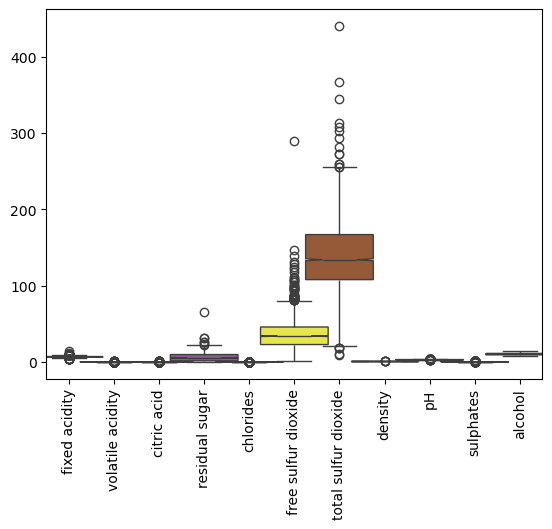

In [5]:
plt.figure ()
sb.boxplot(data=X,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.show()


Podemos notar que 8 das 11 features possuem valores em escalas muito menores do que as outras 3, isso indica a necessidade de normalização ou padronização das variáveis.

Existem muitos outliers em diversas variáveis como mencionado acima, especialmente em free sulfur dioxide e total sulfur dioxide. Essas variáveis possuem valores extremos que podem distorcer a análise se não forem tratados

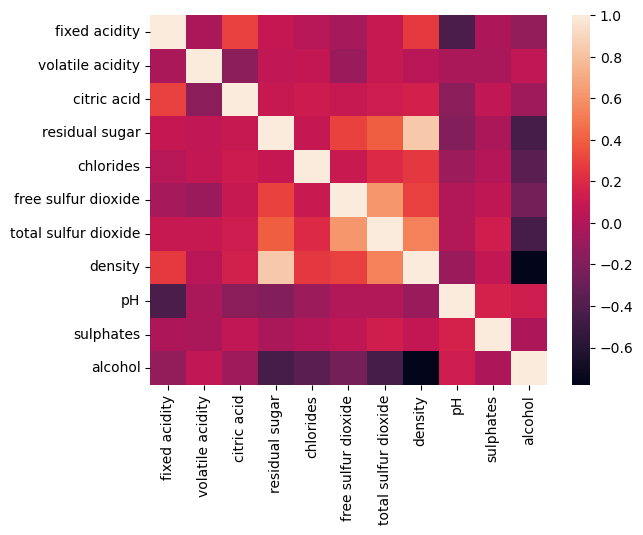

In [6]:
plt.figure ()
corr = X.corr()
sb.heatmap(corr)
plt.show()

> No heatmap acima vemos a correlacao entre as features. Dessa forma, vemos que:
> - Existe forte correlacao negativa entre ph e fixed acidity, alcohol e densidade
> - A densidade também possui uma forte relacao com o residual suger, mas desta vez, positiva
> - Features como fixed acidity, volitile acidity e sulphates nao paressem apresentar forte correlacao com outras features, entao podem ser fortes candidatos para descarte caso seja interessante reduzir as dimencoes da analise

### 2 Classification
#### 2.1 Préparation des données
1. Pour transformer ce problème de classification multi-classe en problème de classificaiton binaire, groupez les données en deux classes de qualités du vin : les ”mauvais vins” avec un indice de qualité inférieure ou égal à 5 et les ”bons vins” avec une qualité supérieure à 5. Pour cela, transformez Y pour qu’il contienne des 0 et 1 à la place des classes initiales.

In [6]:
Y[Y<=5] = 0
Y[Y>5] = 1
Y.groupby(Y).count()

C:\Users\ferna\AppData\Local\Temp\ipykernel_9372\194443087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y<=5] = 0
C:\Users\ferna\AppData\Local\Temp\ipykernel_9372\194443087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y>5] = 1


quality
0    1640
1    3258
Name: quality, dtype: int64

> Ainda nesta nova distribuicao, nao temos um equilibrio entre as classes. Temos aproximadamente o dobro de elementos classificados como bons vinhos 

2. Séparer aléatoirement (X, Y) en trois sous-ensembles Da = (Xa, Ya), Dv = (Xv , Yv ) et Dt = (Xt, Yt), respectivement pour l’apprentissage, la validation et le test. Dans chaque sousensemble, respectez les proportions de classes.

In [7]:
# Primeiro, separe os dados em treino+validação e teste
x_temp, x_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Em seguida, separe os dados temporários em treino e validação
x_train, x_valid, y_train, y_valid = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

ptrain = len(y_train)/len(Y)
ptest = len(y_test)/len(Y)
pvalid = len(y_valid)/len(Y)

# Verificando os tamanhos
print(f"Treinamento: {len(y_train)/len(Y)*100:.2f}%")
print(f"Validação: {len(y_test)/len(Y)*100:.2f}%")
print(f"Teste: {len(y_valid)/len(Y)*100:.2f}%")

Treinamento: 59.98%
Validação: 20.01%
Teste: 20.01%


3. Expliquez briévement pourquoi il est important de respecter les proportions de classe et pourquoi la séparation est aléatoire?

> é importante respeitar a proporcao das classes para garantir que cada uma das etepas tera uma quantidade suficiente de exemplos para realizar o treinamento ou o teste. A separacao aleatoria é responsavel por fornecer uma distribuicao proporcional das classes.

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <h3 style="color:#0056b3;">3. Expliquez briévement pourquoi il est important de respecter les proportions de classe et pourquoi la séparation est aléatoire?</h3>
  <p>
    é importante respeitar a proporcao das classes para garantir que cada uma das etepas tera uma quantidade suficiente de exemplos para realizar o treinamento ou o teste. 
    A separacao aleatoria é responsavel por fornecer uma distribuicao proporcional das classes.
  </p>
</div>


#### 2.2 Plus Proches Voisins
La méthode des k-PPV utilise les instances de $D_a$ comme données de références. Pour une instance x donnée, la classe prédite est la classe majoritaire parmi ses k ∈ N voisins dans $D_a$. Les voisins
sont les instances les plus proches en terme de distance euclidienne dans X . 

1. Testez cette méthode avec k = 3 et évaluez la performance sur $D_v$ en calculant le taux d’erreur :

$$
  \epsilon = \frac{1}{n} \sum_{i=1}^n 1_{y_i \neq \hat{y_i}}
$$

où 1 est la fonction indicatrice, $n$ est le nombre d’instances, $y_i$ sont les vraies classes et $hat{y_i}$ sont les classes prédites.

In [8]:
def Pred_Knn(x_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    return knn

def Valid_Knn(knn, x_valid, y_valid):
    y_pred = knn.predict(x_valid)

    epsilon = np.mean(y_valid != y_pred)

    return epsilon


In [9]:
k = 3
knn = Pred_Knn(x_train, y_train, k)
epsilon = Valid_Knn(knn, x_valid, y_valid)
print(f"k = {k}: Epsilon = {epsilon*100:.2f}%")

k = 3: Epsilon = 31.33%


2. En suivant la même procédure, testez la méthode avec plusieurs autres valeurs de k ∈ N (dans l’intervalle [1, 40]).


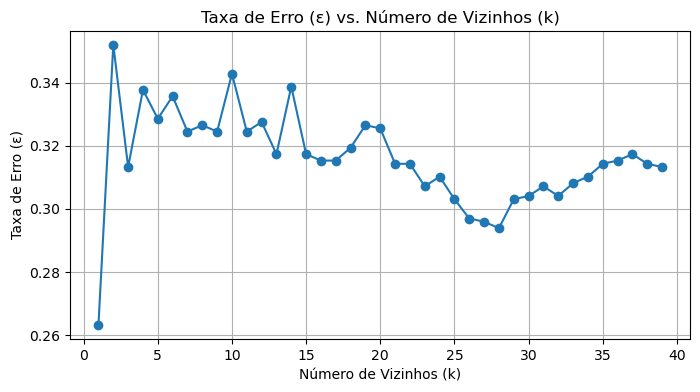

In [10]:
k_values = range(1, 40)
epsilons = []

for k in k_values:
    knn = Pred_Knn(x_train, y_train, k)
    epsilon = Valid_Knn(knn, x_valid, y_valid)
    epsilons.append(epsilon)
    
plt.figure(figsize=(8, 4))
plt.plot(k_values, epsilons, marker='o', linestyle='-')
plt.title('Taxa de Erro (\u03B5) vs. Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Taxa de Erro (\u03B5)')
plt.grid(True)
plt.show()

3. Tracez les courbes d’évolution du taux d’erreur en apprentissage et en validation en fonction de la valeur de k. Expliquez où et comment observer le sur-apprentissage sur la figure

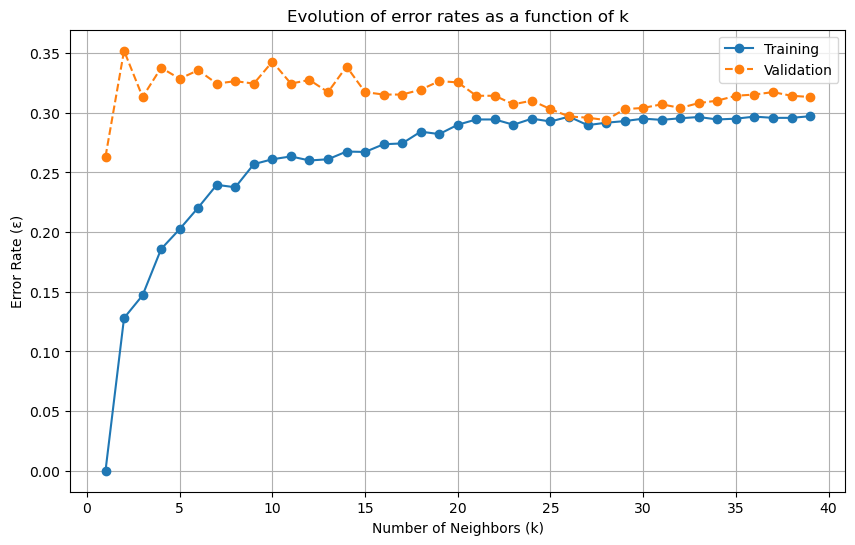

In [11]:
epsilons_train = []

for k in k_values:
    knn = Pred_Knn(x_train, y_train, k)
    epsilon = Valid_Knn(knn, x_train, y_train)
    epsilons_train.append(epsilon)

# Plotando as curvas de erro
plt.figure(figsize=(10, 6))
plt.plot(k_values, epsilons_train, marker='o', label='Training', linestyle='-')
plt.plot(k_values, epsilons, marker='o', label='Validation', linestyle='--')
plt.title("Evolution of error rates as a function of k")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (\u03B5)')
plt.legend()
plt.grid(True)
plt.show()


4. À partir de ces résultats, choisissez la meilleure valeur pour k et évaluer les performances de la méthode sur Dt. Justifiez le choix de cette valeur et commentez les résultats obtenus en test.

#### 2.3 Normaliser ou non les données?
Il est parfois utile de normaliser les valeurs des caractéristiques dans une base de données pour réaliser l’apprentissage. Il s’agit d’uniformiser les valeurs des caractéristiques, en soustrayant la moyenne à chaque valeur et en divisant par l’écart-type. 

1. Reproduisez les expérimentations de l’exercice précédent avec les données normalisées et
comparez les résultats obtenus avec les précédents résultats. Donnez vos conclusions.

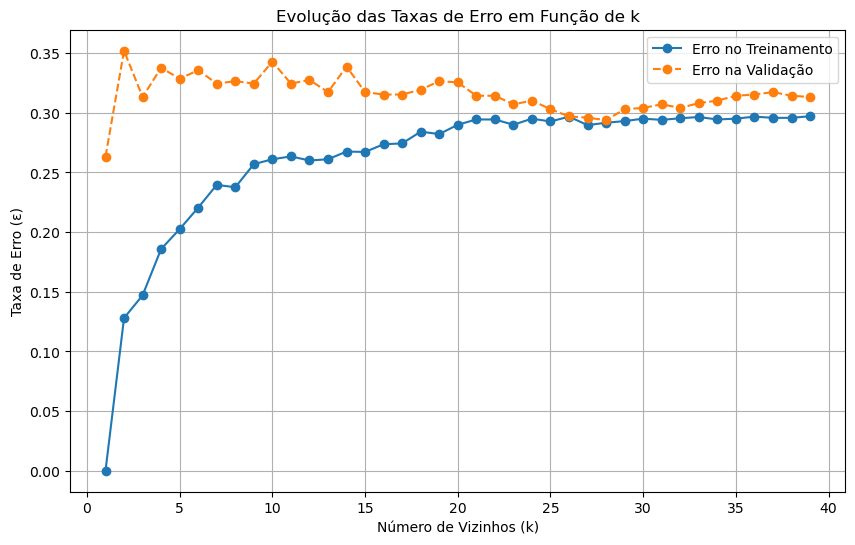

In [13]:
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(x_train)
Xa_n = sc.transform(x_train)
Xv_n = sc.transform(x_valid)
Xt_n = sc.transform(x_test)

epsilons = []
epsilons_train = []

for k in k_values:
    knn = Pred_Knn(x_train, y_train, k)
    epsilon = Valid_Knn(knn, x_valid, y_valid)
    epsilons.append(epsilon)
    epsilon = Valid_Knn(knn, x_train, y_train)
    epsilons_train.append(epsilon)

# Plotando as curvas de erro
plt.figure(figsize=(10, 6))
plt.plot(k_values, epsilons_train, marker='o', label='Erro no Treinamento', linestyle='-')
plt.plot(k_values, epsilons, marker='o', label='Erro na Validação', linestyle='--')
plt.title('Evolução das Taxas de Erro em Função de k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Taxa de Erro (\u03B5)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ferna\AppData\Local\Temp\ipykernel_22912\2355725000.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


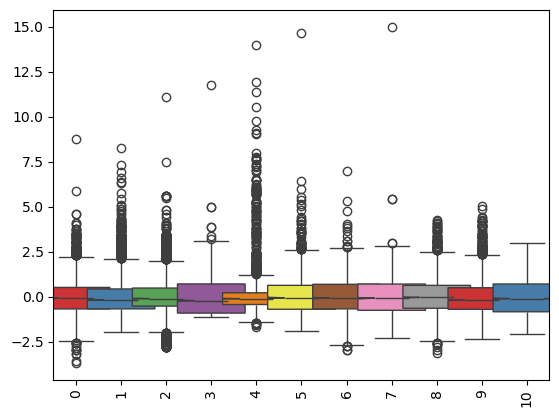

In [17]:
X_n = sc.transform(X)

plt.figure ()
sb.boxplot(data=X_n,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.show()